In [6]:
####### Notebook by James Cummins

In [27]:
# Import libraries
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

In [8]:
places = defaultdict(list)

places['Upper East'] = ['Builsa South','Builsa North Municipal','Kasena Nankana Municipal',
                        'Kasena Nankana West','Bolgatanga Municipal','Talensi','Bolgatanga East',
                        'Bongo','Nabdam','Bawku West','Binduri','Bawku Municipal','Garu','Tempane','Pusiga']

In [9]:
literacy = {}

literacy['Upper East'] = {'Male not literate 6-11': 47.2, 'Female not literate 6-11': 56.3,
                         'Male not literate 11-15': 43.6, 'Female not literate 11-15': 55.2,
                         'Male not literate 15+': 44.6, 'Female not literate 15+': 58.5}

literacy['North East'] = {'Male not literate 6-11': 58.7, 'Female not literate 6-11': 69.1,
                         'Male not literate 11-15': 53.5, 'Female not literate 11-15': 66.9,
                         'Male not literate 15+': 53.1, 'Female not literate 15+': 69.0}

attendance = {}

attendance['Upper East'] = {'Male attending 3-6': 42.3, 'Female attending 3-6': 37.4,
                           'Male attending 6-11': 39.7, 'Female attending 6-11': 34.3}

attendance['North East'] = {'Male attending 3-6': 38.5, 'Female attending 3-6': 32.8,
                           'Male attending 6-11': 36.6, 'Female attending 6-11': 30.2}


In [10]:
ages = [6, 11, 15]

male_not_literate_dep = [47.2, 43.6, 44.6]
female_not_literate_dep = [56.3, 55.2, 58.5]

male_not_literate_con = [58.7, 53.5, 53.1]
female_not_literate_con = [69.1, 66.9, 69.0]

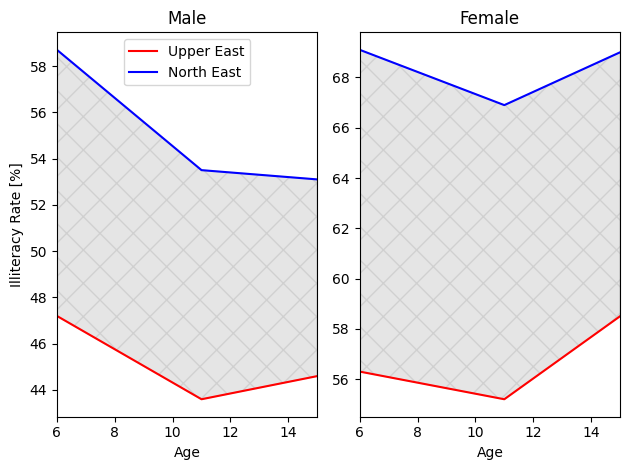

In [11]:
plt.subplot(1, 2, 1)
plt.fill_between(ages, male_not_literate_con, male_not_literate_dep, color='grey', alpha=0.2, hatch="x")
plt.plot(ages, male_not_literate_dep, color='red', label='Upper East')
plt.plot(ages, male_not_literate_con, color='blue', label='North East')

plt.title('Male')
plt.ylabel('Illiteracy Rate [%]')
plt.xlabel('Age')
plt.legend(loc='upper center')
plt.xlim([ages[0], ages[-1]])

plt.subplot(1, 2, 2)
plt.fill_between(ages, female_not_literate_con, female_not_literate_dep, color='grey', alpha=0.2, hatch="x")
plt.plot(ages, female_not_literate_dep, color='red', label='Upper East')
plt.plot(ages, female_not_literate_con, color='blue', label='North East')

plt.title('Female')
plt.xlim([ages[0], ages[-1]])
plt.xlabel('Age')

plt.tight_layout()
plt.show()

In [14]:
ages = [3, 6]

male_attending_dep = [42.3, 39.7]
female_attending_dep = [37.4, 34.3]

male_diff_dep = 42.3 - 39.7
male_diff_con = 38.5 - 36.6

male_attending_con = [38.5, 36.6]
female_attending_con = [32.8, 30.2]

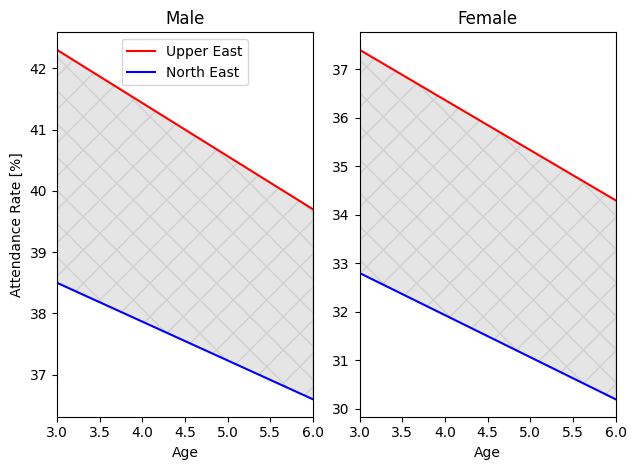

In [13]:
plt.subplot(1, 2, 1)
plt.fill_between(ages, male_attending_con, male_attending_dep, color='grey', alpha=0.2, hatch="x")
plt.plot(ages, male_attending_dep, color='red', label='Upper East')
plt.plot(ages, male_attending_con, color='blue', label='North East')

plt.title('Male')
plt.ylabel('Attendance Rate [%]')
plt.xlabel('Age')
plt.legend(loc='upper center')
plt.xlim([ages[0], ages[-1]])

plt.subplot(1, 2, 2)
plt.fill_between(ages, female_attending_con, female_attending_dep, color='grey', alpha=0.2, hatch="x")
plt.plot(ages, female_attending_dep, color='red', label='Upper East')
plt.plot(ages, female_attending_con, color='blue', label='North East')

plt.title('Female')
plt.xlim([ages[0], ages[-1]])
plt.xlabel('Age')

plt.tight_layout()
plt.show()

In [79]:
#years = ['2010_2011', '2011_2012', '2012_2013', '2013_2014', '2014_2015', '2015_2016']
#numeric_year = [2010.5, 2011.5, 2012.5, 2013.5, 2014.5, 2015.5]

years = ['2010_2011', '2011_2012', '2013_2014', '2014_2015', '2015_2016']
numeric_year = [2010.5, 2011.5, 2013.5, 2014.5, 2015.5]

maths_data_dep = -np.ones((len(years), len(variables)))
maths_data_con = -np.ones((len(years), len(variables)))

variables = ['MathsTotal_Male', 'MathsTotal_Female', 'MathsPass_Male', 'MathsPass_Female']

for i, year in enumerate(years):
    
    df = pd.read_csv('Census_Data/Basic Schs ' + year + '-Table 1.csv')
    
    if 'region' in list(df.columns):
        df_upper_east = df[df['region'] == 'UPPER EAST']
        df_upper_west = df[df['region'] == 'UPPER WEST']
    elif 'Region' in list(df.columns):
        df_upper_east = df[df['Region'] == 'UPPER EAST']
        df_upper_west = df[df['Region'] == 'UPPER WEST']
    else:
        print("Error")
    
    for j, variable in enumerate(variables):
        if variable in df_upper_east.columns:
            maths_data_dep[i][j] = np.sum(df_upper_east[variable])
        if variable in df_upper_west.columns:
            maths_data_con[i][j] = np.sum(df_upper_west[variable])


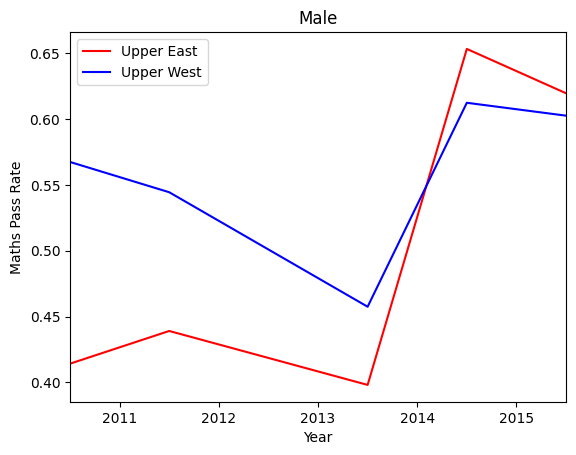

In [83]:
plt.plot(numeric_year, maths_data_dep[:, 2] / maths_data_dep[:, 0], color='red', label='Upper East')
plt.plot(numeric_year, maths_data_con[:, 2] / maths_data_con[:, 0], color='blue', label='Upper West')

plt.xlim([numeric_year[0], numeric_year[-1]])
plt.title('Male')
plt.xlabel('Year')
plt.ylabel('Maths Pass Rate')
plt.legend()
plt.show()

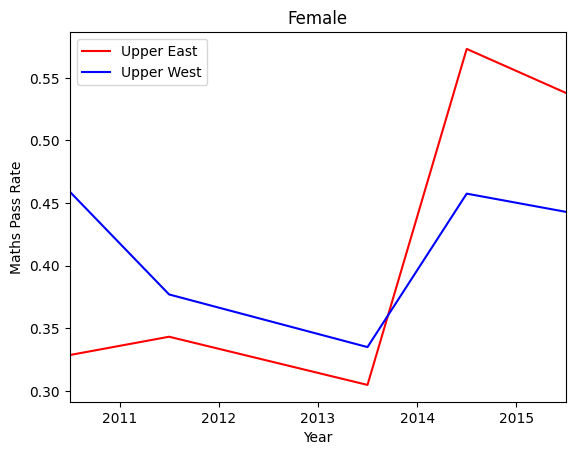

In [84]:
plt.plot(numeric_year, maths_data_dep[:, 3] / maths_data_dep[:, 1], color='red', label='Upper East')
plt.plot(numeric_year, maths_data_con[:, 3] / maths_data_con[:, 1], color='blue', label='Upper West')

plt.xlim([numeric_year[0], numeric_year[-1]])
plt.title('Female')
plt.xlabel('Year')
plt.ylabel('Maths Pass Rate')
plt.legend()
plt.show()